In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("healthmonitoring.csv")

In [6]:
df.head()

,PatientID,Age,Gender,HeartRate,BloodPressure,RespiratoryRate,BodyTemperature,ActivityLevel,OxygenSaturation,SleepQuality,StressLevel,Timestamp
0,1,69,Male,60.993428,130/85,15,98.885236,resting,95.0,excellent,low,2024-04-26 17:28:55.286711
1,2,32,Male,98.723471,120/80,23,98.281883,walking,97.0,good,high,2024-04-26 17:23:55.286722
2,3,78,Female,82.295377,130/85,13,98.820286,resting,98.0,fair,high,2024-04-26 17:18:55.286726
3,4,38,Female,80.000000,111/78,19,98.412594,running,98.0,poor,moderate,2024-04-26 17:13:55.286728
4,5,41,Male,87.531693,120/80,14,99.369871,resting,98.0,good,low,2024-04-26 17:08:55.286731


PatientID: Numerical identifier for the patient.
Age: Age of the patient in years.
Gender: Gender of the patient.
HeartRate: Heart rate in beats per minute.
BloodPressure: Blood pressure readings, formatted inconsistently.
RespiratoryRate: Respiratory rate in breaths per minute.
BodyTemperature: Body temperature in Fahrenheit.
ActivityLevel: Activity level at the time of the measurement.
OxygenSaturation: Oxygen saturation percentage.
SleepQuality: Quality of sleep reported by the patient.
StressLevel: Reported level of stress.
Timestamp: Date and time of the measurement.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         500 non-null    int64  
 1   Age               500 non-null    int64  
 2   Gender            500 non-null    object 
 3   HeartRate         500 non-null    float64
 4   BloodPressure     500 non-null    object 
 5   RespiratoryRate   500 non-null    int64  
 6   BodyTemperature   482 non-null    float64
 7   ActivityLevel     500 non-null    object 
 8   OxygenSaturation  337 non-null    float64
 9   SleepQuality      500 non-null    object 
 10  StressLevel       500 non-null    object 
 11  Timestamp         500 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 47.0+ KB


In [9]:
df.isna().sum()

PatientID             0
Age                   0
Gender                0
HeartRate             0
BloodPressure         0
RespiratoryRate       0
BodyTemperature      18
ActivityLevel         0
OxygenSaturation    163
SleepQuality          0
StressLevel           0
Timestamp             0
dtype: int64

So we can find the null values in both BodyTemperature & OxygenSaturation. so lets fill it up with median


In [10]:
BodyTemperature_median = df["BodyTemperature"].median()
OxygenSaturation_median = df["OxygenSaturation"].median()

In [11]:
df['BodyTemperature'].fillna(BodyTemperature_median, inplace=True)
df['OxygenSaturation'].fillna(OxygenSaturation_median, inplace=True)

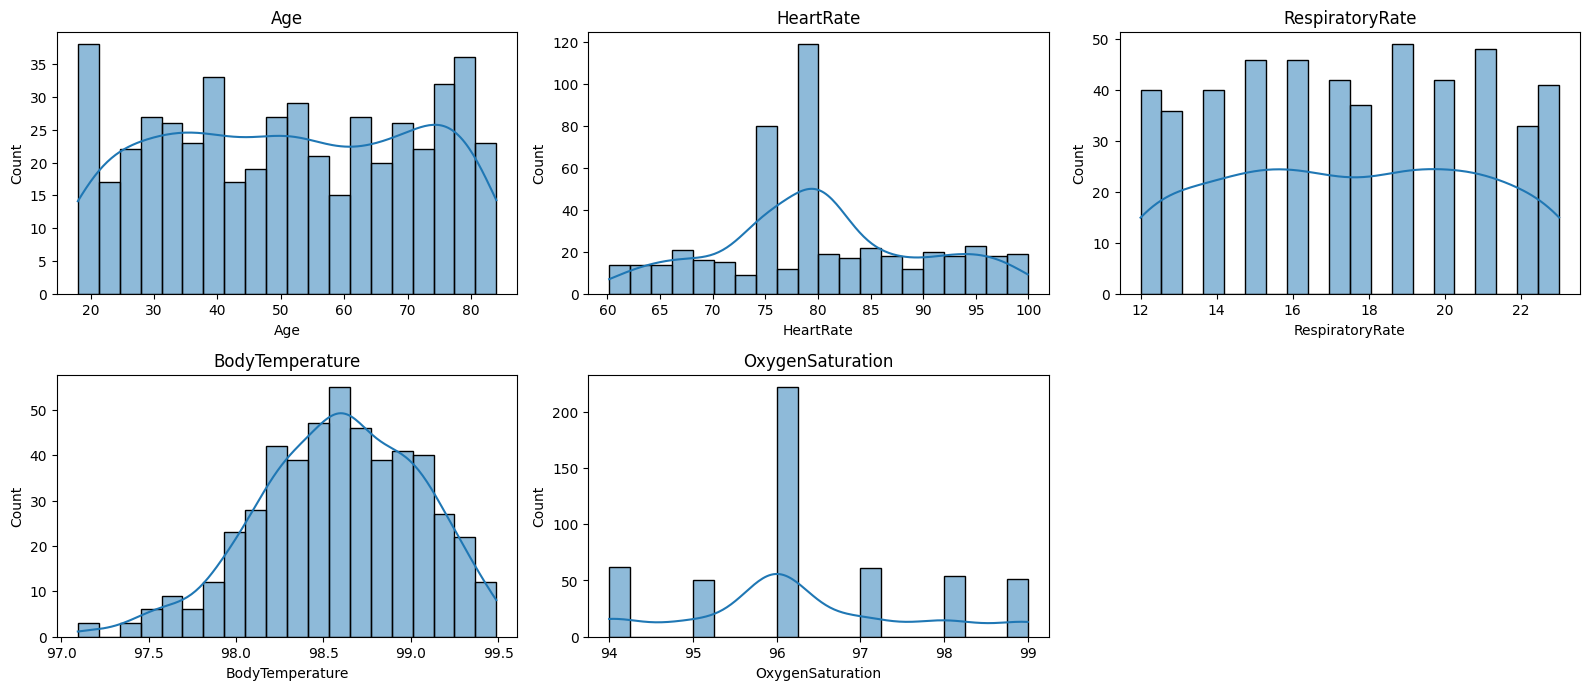

In [40]:
#get numerical columns
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
numerical_cols = numerical_cols[1:] #exclude patient id

#Now lets do some Univariate analysis on our data , lets see if we get any insights from this analysis
fig = plt.figure(figsize=(16,10))
for index,col in enumerate(numerical_cols):
  ax1 = fig.add_subplot(3,3,index+1)
  sns.histplot(df[col],kde=True,bins=20)
  ax1.set_title(col)
plt.tight_layout()

plt.show()

In [41]:
df.describe()

,PatientID,Age,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,51.146000,80.131613,17.524000,98.584383,96.296000
std,144.481833,19.821566,9.606273,3.382352,0.461502,1.408671
min,1.000000,18.000000,60.169259,12.000000,97.094895,94.000000
25%,125.750000,34.000000,75.000000,15.000000,98.281793,96.000000
50%,250.500000,51.000000,80.000000,17.500000,98.609167,96.000000
75%,375.250000,69.000000,86.276413,20.000000,98.930497,97.000000
max,500.000000,84.000000,99.925508,23.000000,99.489150,99.000000


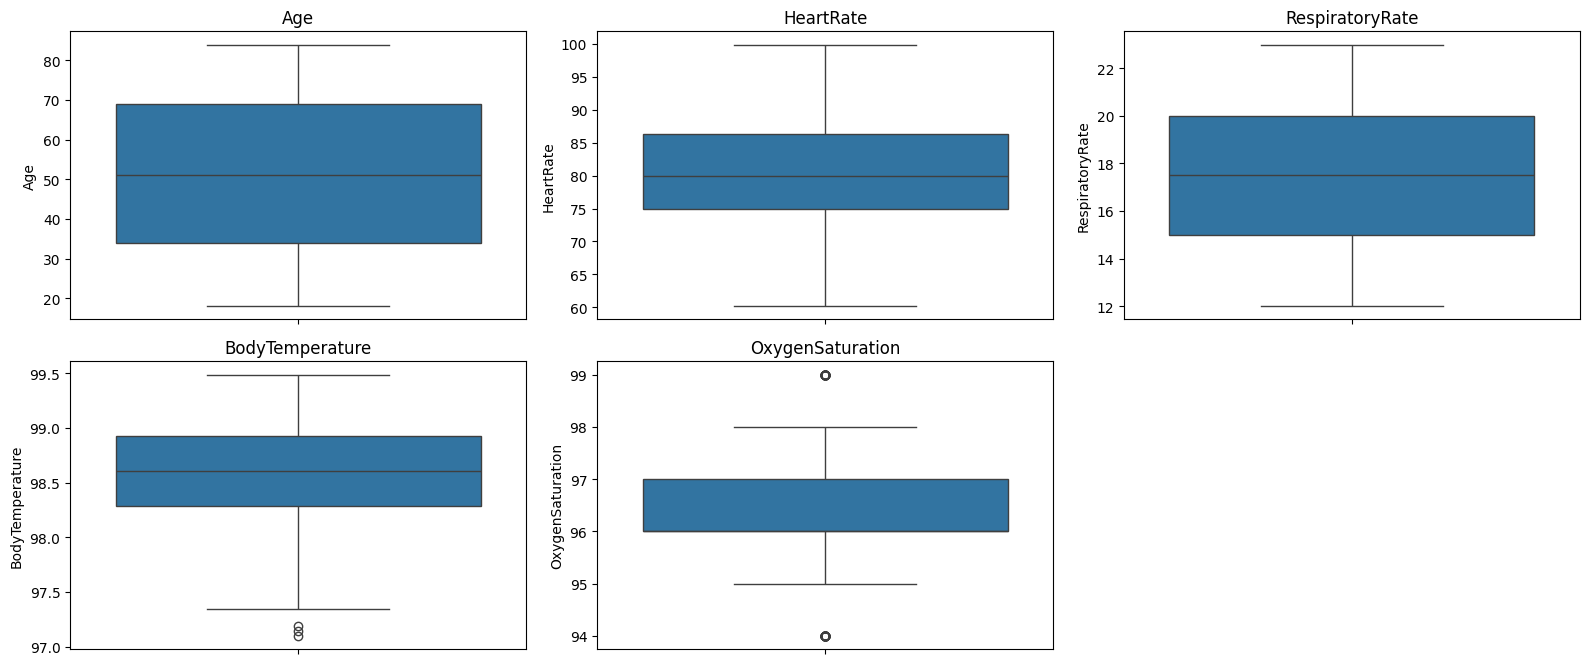

In [43]:
fig = plt.figure(figsize=(16,10))
for index,col in enumerate(numerical_cols):
  ax1 = fig.add_subplot(3,3,index+1)
  sns.boxplot(df[col])
  ax1.set_title(col)
plt.tight_layout()

plt.show()

In [44]:
#lets find the correlation between the numerical columns of the data
df[numerical_cols].corr()


,Age,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation
Age,1.000000,-0.055109,0.011530,-0.014600,-0.099088
HeartRate,-0.055109,1.000000,0.079749,0.006981,0.019462
RespiratoryRate,0.011530,0.079749,1.000000,0.057665,0.036360
BodyTemperature,-0.014600,0.006981,0.057665,1.000000,-0.001025
OxygenSaturation,-0.099088,0.019462,0.036360,-0.001025,1.000000


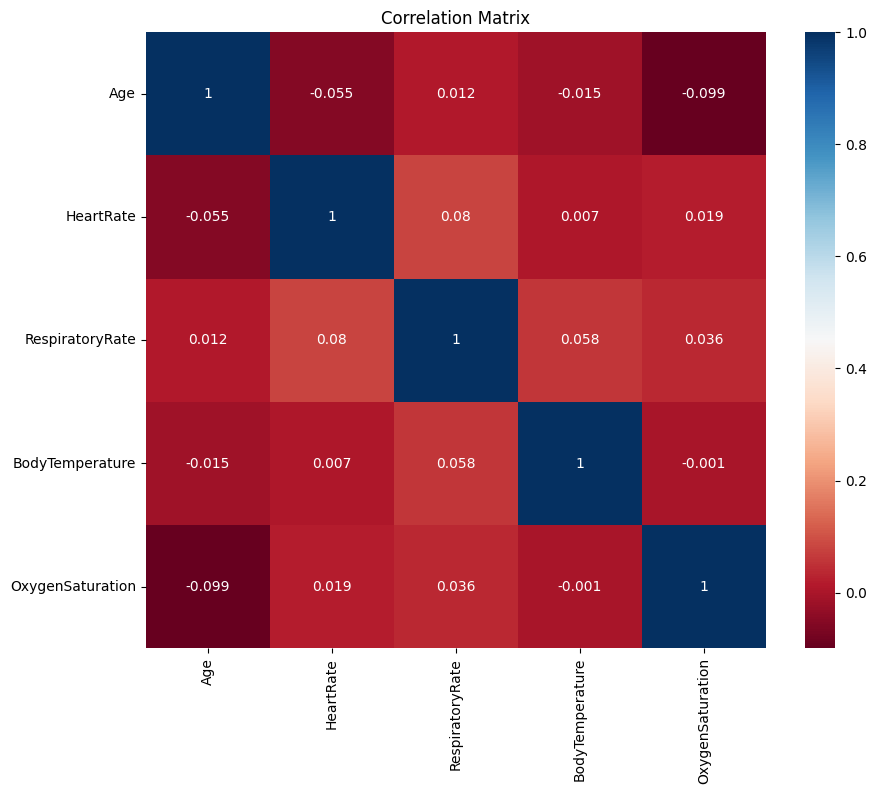

In [48]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap="RdBu")
ax1.set_title("Correlation Matrix")
plt.show()

Here we find no strong correlation between any two variables


In [57]:
#lets see the distribution of gender
gender_dif = (df["Gender"].value_counts()/len(df))*100
print(gender_dif)

Gender
Male      51.2
Female    48.8
Name: count, dtype: float64


In [63]:
round(gender_dif["Male"] - gender_dif["Female"], 2)


2.4

<Axes: xlabel='Gender', ylabel='count'>

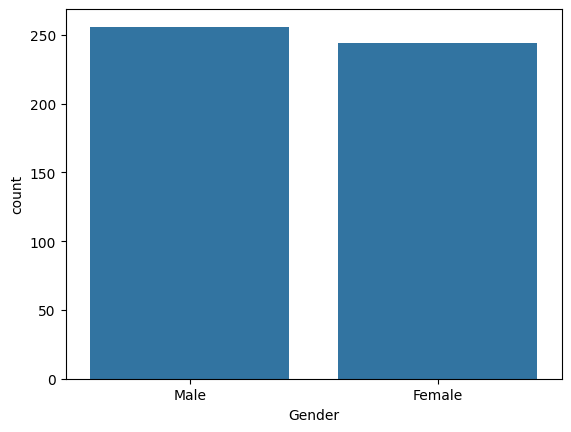

In [53]:
sns.countplot(x=df["Gender"])

There is a slight majority of male i.e 2.4 percent

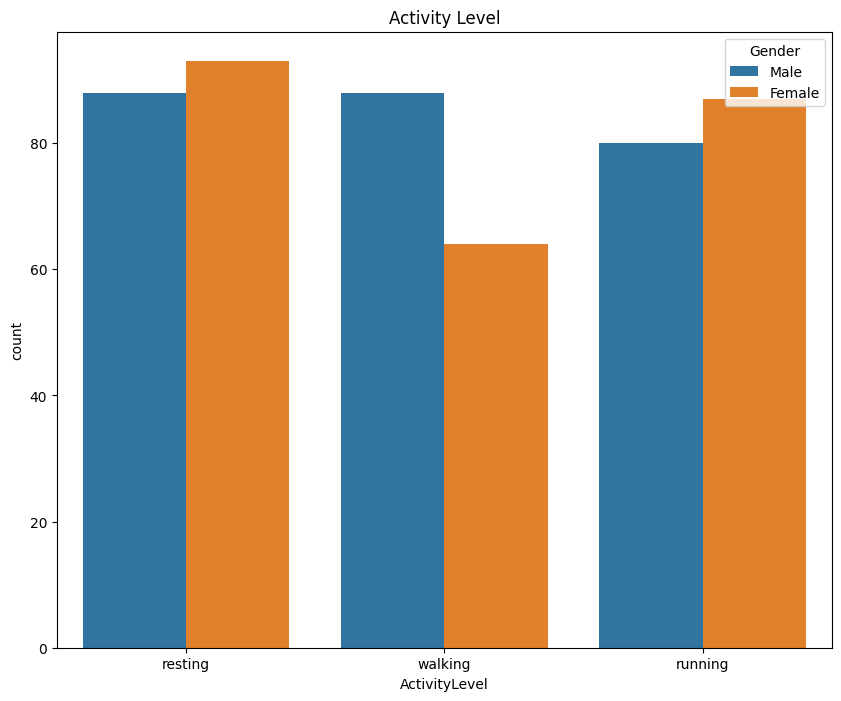

In [65]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,1,1)
sns.countplot(x=df["ActivityLevel"],hue=df["Gender"])
ax1.set_title("Activity Level")
plt.show()

the above visualization is between the activity level based on genders, we can see the category female has slight majority in both resting and running and male has majority in walking


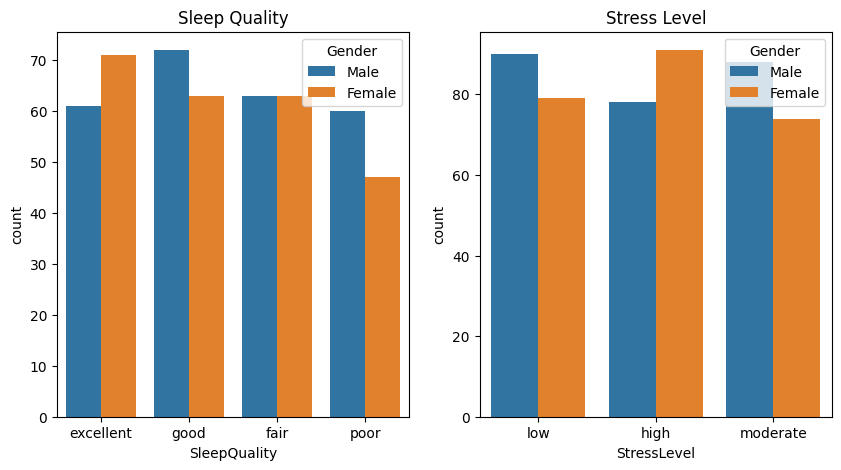

In [67]:
fig  = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
sns.countplot(x=df["SleepQuality"],hue=df["Gender"])
ax1.set_title("Sleep Quality")
ax2 = fig.add_subplot(1,2,2)
sns.countplot(x=df["StressLevel"],hue=df["Gender"])
ax2.set_title("Stress Level")
plt.show()

Female showing a slight majority in high stress level compared to male


In [ ]:
#lets dive deeper and understand the data
